# EDA + PREDICCIONES PCOS (RANDOM FOREST + GBM)
***

## 1) Importar librerías

In [26]:
import numpy as np
import pandas as pd
import os

## 2) Cargar datasets

In [27]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/exploring-predictive-health-factors/sample_submission.csv
/kaggle/input/exploring-predictive-health-factors/train.csv
/kaggle/input/exploring-predictive-health-factors/test.csv


## 3) Creación conjunto de datos 

In [37]:
df_train = pd.read_csv('/kaggle/input/exploring-predictive-health-factors/train.csv')
df_train.head()

,ID,Age,Weight_kg,PCOS,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Conception_Difficulty,Insulin_Resistance,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Exercise_Benefit
0,0,20-25,64.0,No,No,No,No,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,Somewhat
1,1,15-20,55.0,No,No,No,No,No,No,6-8 Times a Week,No Exercise,Less than 30 minutes,6-8 hours,Somewhat
2,2,15-20,91.0,No,No,No,Yes,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Somewhat
3,3,15-20,56.0,No,No,No,No,No,No,6-8 Times a Week,"Cardio (e.g., running, cycling, swimming)",45 minutes,6-8 hours,Not at All
4,4,15-20,47.0,No,Yes,No,No,No,No,Rarely,No Exercise,Not Applicable,6-8 hours,Not Much


In [4]:
test = pd.read_csv('/kaggle/input/exploring-predictive-health-factors/test.csv')
test.head()

,ID,Age,Weight_kg,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Conception_Difficulty,Insulin_Resistance,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Exercise_Benefit
0,0,20-25,54.0,No,No,No,No,No,Rarely,No Exercise,Less than 30 minutes,6-8 hours,Somewhat
1,1,20-25,65.0,Yes,No,No,No,No,3-4 Times a Week,No Exercise,Not Applicable,6-8 hours,Somewhat
2,2,20-25,64.0,Yes,No,No,No,No,6-8 Times a Week,Cardio (e.g.,Not Applicable,6-8 hours,Somewhat
3,3,Less than 20,57.0,Yes,No,Yes,No,Yes,Rarely,No Exercise,6-8 hours,6-8 hours,Somewhat
4,4,Less than 20,6.0,Yes,No,Yes,No,No,Rarely,Cardio (e.g.,30 minutes,6-8 hours,Somewhat


In [5]:
sample_submission = pd.read_csv('/kaggle/input/exploring-predictive-health-factors/sample_submission.csv')
sample_submission.head()

,ID,PCOS
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


## 4) Análisis del conjunto 

### a) Tipo de campos

In [8]:
df_train.dtypes

ID                         int64
Age                       object
Weight_kg                float64
PCOS                      object
Hormonal_Imbalance        object
Hyperandrogenism          object
Hirsutism                 object
Conception_Difficulty     object
Insulin_Resistance        object
Exercise_Frequency        object
Exercise_Type             object
Exercise_Duration         object
Sleep_Hours               object
Exercise_Benefit          object
dtype: object

### b) Valores únicos

In [29]:
for col in df_train.select_dtypes(include='object').columns:
    unique_values = pd.DataFrame({col: df_train[col].unique()}, columns=[col])
    
    print(unique_values.to_string(index=False))  
    print("-" * 50)  


            Age
          20-25
          15-20
   45 and above
          30-35
          35-44
          25-30
            NaN
   Less than 20
          30-25
          30-40
Less than 20-25
--------------------------------------------------
PCOS
  No
 Yes
--------------------------------------------------
                Hormonal_Imbalance
                                No
                               Yes
                               NaN
No, Yes, not diagnosed by a doctor
                 Yes Significantly
--------------------------------------------------
Hyperandrogenism
              No
             Yes
             NaN
--------------------------------------------------
                         Hirsutism
                                No
                               Yes
No, Yes, not diagnosed by a doctor
                               NaN
--------------------------------------------------
             Conception_Difficulty
                                No
        Yes, di

### c) Procesamiento tipo de campos

In [38]:
object_columns = df_train.select_dtypes(include=['object']).columns.tolist()
df_train[object_columns] = df_train[object_columns].astype('category')

print(df_train.isnull().sum())
df_train.dtypes

ID                       0
Age                      1
Weight_kg                2
PCOS                     0
Hormonal_Imbalance       2
Hyperandrogenism         3
Hirsutism                5
Conception_Difficulty    1
Insulin_Resistance       1
Exercise_Frequency       2
Exercise_Type            2
Exercise_Duration        2
Sleep_Hours              2
Exercise_Benefit         1
dtype: int64


ID                          int64
Age                      category
Weight_kg                 float64
PCOS                     category
Hormonal_Imbalance       category
Hyperandrogenism         category
Hirsutism                category
Conception_Difficulty    category
Insulin_Resistance       category
Exercise_Frequency       category
Exercise_Type            category
Exercise_Duration        category
Sleep_Hours              category
Exercise_Benefit         category
dtype: object

In [20]:
object_columns = test.select_dtypes(include=['object']).columns.tolist()
test[object_columns] = test[object_columns].astype('category')

print(test.isnull().sum())
test.dtypes

ID                       0
Age                      1
Weight_kg                2
Hormonal_Imbalance       3
Hyperandrogenism         1
Hirsutism                2
Conception_Difficulty    2
Insulin_Resistance       1
Exercise_Frequency       1
Exercise_Type            1
Exercise_Duration        0
Sleep_Hours              1
Exercise_Benefit         1
dtype: int64


ID                          int64
Age                      category
Weight_kg                 float64
Hormonal_Imbalance       category
Hyperandrogenism         category
Hirsutism                category
Conception_Difficulty    category
Insulin_Resistance       category
Exercise_Frequency       category
Exercise_Type            category
Exercise_Duration        category
Sleep_Hours              category
Exercise_Benefit         category
dtype: object

### d) Datos adicionales

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     210 non-null    int64   
 1   Age                    209 non-null    category
 2   Weight_kg              208 non-null    float64 
 3   PCOS                   210 non-null    category
 4   Hormonal_Imbalance     208 non-null    category
 5   Hyperandrogenism       207 non-null    category
 6   Hirsutism              205 non-null    category
 7   Conception_Difficulty  209 non-null    category
 8   Insulin_Resistance     209 non-null    category
 9   Exercise_Frequency     208 non-null    category
 10  Exercise_Type          208 non-null    category
 11  Exercise_Duration      208 non-null    category
 12  Sleep_Hours            208 non-null    category
 13  Exercise_Benefit       209 non-null    category
dtypes: category(12), float64(1), int64(1)
memo

In [13]:
df_train.describe()

,ID,Weight_kg
count,210.000000,208.000000
mean,104.500000,56.159615
std,60.765944,12.572768
min,0.000000,20.000000
25%,52.250000,48.000000
50%,104.500000,55.000000
75%,156.750000,64.000000
max,209.000000,116.000000


In [10]:
df_train.nunique()

ID                       210
Age                       10
Weight_kg                 59
PCOS                       2
Hormonal_Imbalance         4
Hyperandrogenism           2
Hirsutism                  3
Conception_Difficulty      4
Insulin_Resistance         3
Exercise_Frequency         8
Exercise_Type             16
Exercise_Duration          8
Sleep_Hours                5
Exercise_Benefit           4
dtype: int64

## 5) Features

In [39]:
hormonal_map = {
    'No': 0,  
    'Yes': 1,  
    'Yes Significantly': 1,  
    'No, Yes, not diagnosed by a doctor': None  
}

conception_map = {
    'No': 0,
    'Yes, diagnosed by a doctor': 1,
    'Yes': 1,
    'No, Yes, not diagnosed by a doctor': None
}

insulin_map = {
    'No': 0,
    'Yes': 1,
    'No, Yes, not diagnosed by a doctor': None
}

age_mapping = {
    'Less than 20': 'Less than 20',
    'Less than 20-25': 'Less than 20',
    '15-20': 'Less than 20',
    '20-25': '20-25',
    '25-30': '25-30',
    '30-35': 'More than 30',
    '35-44': 'More than 30',
    '45 and above': 'More than 30',
    '30-25': '25-30',  
    '30-40': 'More than 30'}

hirsutism_map ={
     'No':'No',
     'Yes':'Yes',
     'No, Yes, not diagnosed by a doctor': None
 }

sleep_hours_map ={
    'Less than 6 hours': 'Less than 6 hours',
    '6-8 hours':'6-8 hours',
    'NaN': None,
    '9-12 hours':'9-12 hours',
    'More than 12 hours':'More than 12 hours',
    '3-4 hours': 'Less than 6 hours'

}

                                                                                                                                 
exercise_duration_map={
    '30 minutes':'30 minutes',
    'Less than 30 minutes':'Less than 30 minutes',
    '45 minutes':'More than 30 minutes',
    'Not Applicable':'Not Applicable',
    'More than 30 minutes':'More than 30 minutes',
    'NaN': None,
    '20 minutes':'Less than 30 minutes',
    'Less than 6 hours':'Less than 6 hours',
    '30 minutes to 1 hour': 'More than 30 minutes'                                                                                                                                    
 }

exercise_type_map = {
    'No Exercise': 'None',
    'Cardio (e.g., running, cycling, swimming)': 'Cardio',
    'Strength training (e.g., weightlifting, resistance exercises)': 'Strength',
    'Flexibility and balance (e.g., yoga, pilates)': 'Flexibility',
    'High-intensity interval training (HIIT)': 'HIIT',
    
    'Cardio (e.g., running, cycling, swimming), Strength training (e.g., weightlifting, resistance exercises)': 'Cardio + Strength',
    'Cardio (e.g., running, cycling, swimming), Flexibility and balance (e.g., yoga, pilates)': 'Cardio + Flexibility',
    'Strength training (e.g., weightlifting, resistance exercises), Flexibility and balance (e.g., yoga, pilates)': 'Strength + Flexibility',
    
    'Cardio (e.g., running, cycling, swimming), Strength training (e.g., weightlifting, resistance exercises), Flexibility and balance (e.g., yoga, pilates)': 'Cardio + Strength + Flexibility',
    
    'Flexibility and balance (e.g., yoga, pilates), None': 'Flexibility',  
    'Cardio (e.g., running, cycling, swimming), None': 'Cardio',  

    'NaN': None,
    'Somewhat': 'Somewhat'  
}

        

In [40]:
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

df_train.replace({None: np.nan, 'NaN': np.nan}, inplace=True)
df_train.replace([np.inf, -np.inf], np.nan, inplace=True) 
df_train['Hormonal_Imbalance'] = df_train['Hormonal_Imbalance'].map(hormonal_map).astype('category')
df_train['Conception_Difficulty'] = df_train['Conception_Difficulty'].map(conception_map).astype('category')
df_train['Insulin_Resistance'] = df_train['Insulin_Resistance'].map(insulin_map).astype('category')
df_train['Age'] = df_train['Age'].map(age_mapping).astype('category')
df_train['Hirsutism'] = df_train['Hirsutism'].map(hirsutism_map).astype('category')
df_train['Sleep_Hours'] = df_train['Sleep_Hours'].map(sleep_hours_map).astype('category')
df_train['Exercise_Duration'] = df_train['Exercise_Duration'].map(exercise_duration_map).astype('category')
df_train['Exercise_Type'] = df_train['Exercise_Type'].map(exercise_type_map).astype('category')


for col in df_train.select_dtypes(include='category').columns:
    unique_values = pd.DataFrame({col: df_train[col].unique()}, columns=[col])
    
    print(unique_values.to_string(index=False))  
    print("-" * 50)  

df_train.dtypes

         Age
       20-25
Less than 20
More than 30
       25-30
         NaN
--------------------------------------------------
PCOS
  No
 Yes
--------------------------------------------------
Hormonal_Imbalance
               0.0
               1.0
               NaN
--------------------------------------------------
Hyperandrogenism
              No
             Yes
             NaN
--------------------------------------------------
Hirsutism
       No
      Yes
      NaN
--------------------------------------------------
Conception_Difficulty
                  0.0
                  1.0
                  NaN
--------------------------------------------------
Insulin_Resistance
               0.0
               1.0
               NaN
--------------------------------------------------
Exercise_Frequency
            Rarely
  6-8 Times a Week
             Never
  1-2 Times a Week
  3-4 Times a Week
               NaN
         6-8 hours
   Less than usual
 Less than 6 hours
------------

ID                          int64
Age                      category
Weight_kg                 float64
PCOS                     category
Hormonal_Imbalance       category
Hyperandrogenism         category
Hirsutism                category
Conception_Difficulty    category
Insulin_Resistance       category
Exercise_Frequency       category
Exercise_Type            category
Exercise_Duration        category
Sleep_Hours              category
Exercise_Benefit         category
dtype: object

## 6) Outputs gráficos

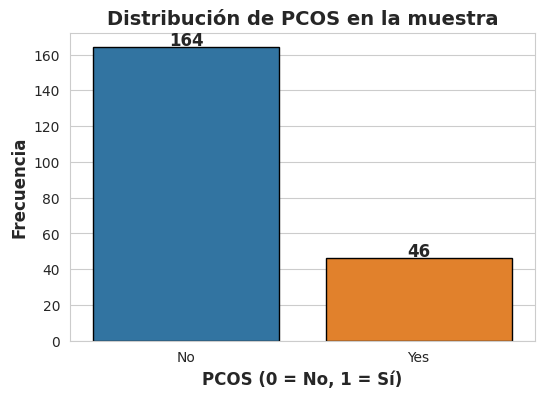

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de Seaborn
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Contar valores de PCOS
pcos_counts = df_train['PCOS'].value_counts()

# Crear la figura y el gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=pcos_counts.index.astype(str), y=pcos_counts.values, 
                 palette=['#1f77b4', '#ff7f0e'], edgecolor='black')

# Etiquetas y título
plt.xlabel('PCOS (0 = No, 1 = Sí)', fontsize=12, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12, fontweight='bold')
plt.title('Distribución de PCOS en la muestra', fontsize=14, fontweight='bold')

# Agregar etiquetas de valores en las barras
for i, v in enumerate(pcos_counts.values):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12, fontweight='bold')

# Mostrar la gráfica
plt.show()

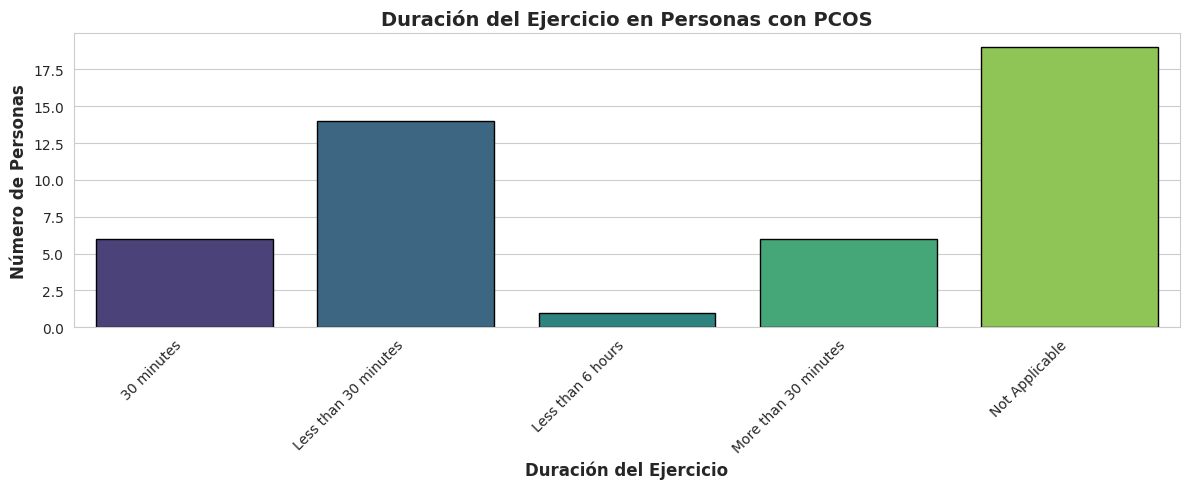

In [56]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo personas con PCOS
df_pcos_yes = df_train[df_train['PCOS'] == 'Yes']
category_counts = df_pcos_yes['Exercise_Duration'].value_counts().groupby(level=0, observed=True).sum()


# Configuración de estilo con Seaborn
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Crear la figura y el gráfico de barras
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, 
                 palette="viridis", edgecolor='black')

# Etiquetas y título mejorados
plt.xlabel('Duración del Ejercicio', fontsize=12, fontweight='bold')
plt.ylabel('Número de Personas', fontsize=12, fontweight='bold')
plt.title('Duración del Ejercicio en Personas con PCOS', fontsize=14, fontweight='bold')

# Rotación de etiquetas en eje X para evitar solapamiento
plt.xticks(rotation=45, ha='right')

# Ajustar diseño para evitar que se corten etiquetas
plt.tight_layout()

# Mostrar la gráfica
plt.show()

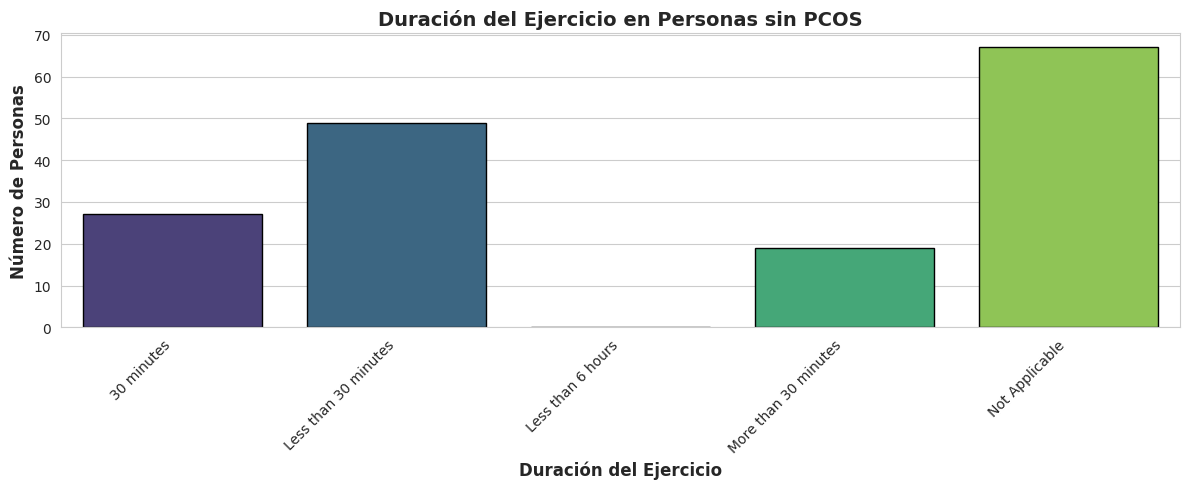

In [59]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo personas con PCOS
df_pcos_no = df_train[df_train['PCOS'] == 'No']
category_counts = df_pcos_yes['Exercise_Duration'].value_counts().groupby(level=0, observed=True).sum()


# Configuración de estilo con Seaborn
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Crear la figura y el gráfico de barras
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, 
                 palette="viridis", edgecolor='black')

# Etiquetas y título mejorados
plt.xlabel('Duración del Ejercicio', fontsize=12, fontweight='bold')
plt.ylabel('Número de Personas', fontsize=12, fontweight='bold')
plt.title('Duración del Ejercicio en Personas sin PCOS', fontsize=14, fontweight='bold')

# Rotación de etiquetas en eje X para evitar solapamiento
plt.xticks(rotation=45, ha='right')

# Ajustar diseño para evitar que se corten etiquetas
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

df_pcos_yes = df_train[df_train['PCOS'] == 'Yes']
df_pcos_no = df_train[df_train['PCOS'] == 'No']


category_counts = df_pcos_yes['Conception_Difficulty'].value_counts()
category_counts2 = df_pcos_no['Conception_Difficulty'].value_counts()

# Crear un DataFrame con los valores de conteo
df_counts = pd.DataFrame({
    'Conception_Difficulty': category_counts.index.tolist() + category_counts2.index.tolist(),
    'Count': category_counts.tolist() + category_counts2.tolist(),
    'Group': ['PCOS Yes'] * len(category_counts) + ['PCOS No'] * len(category_counts2)
})

# Mostrar como tabla ordenada
df_counts.pivot(index='Conception_Difficulty', columns='Group', values='Count').fillna(0)



Group,PCOS No,PCOS Yes
Conception_Difficulty,,
0.0,161,40
1.0,1,6


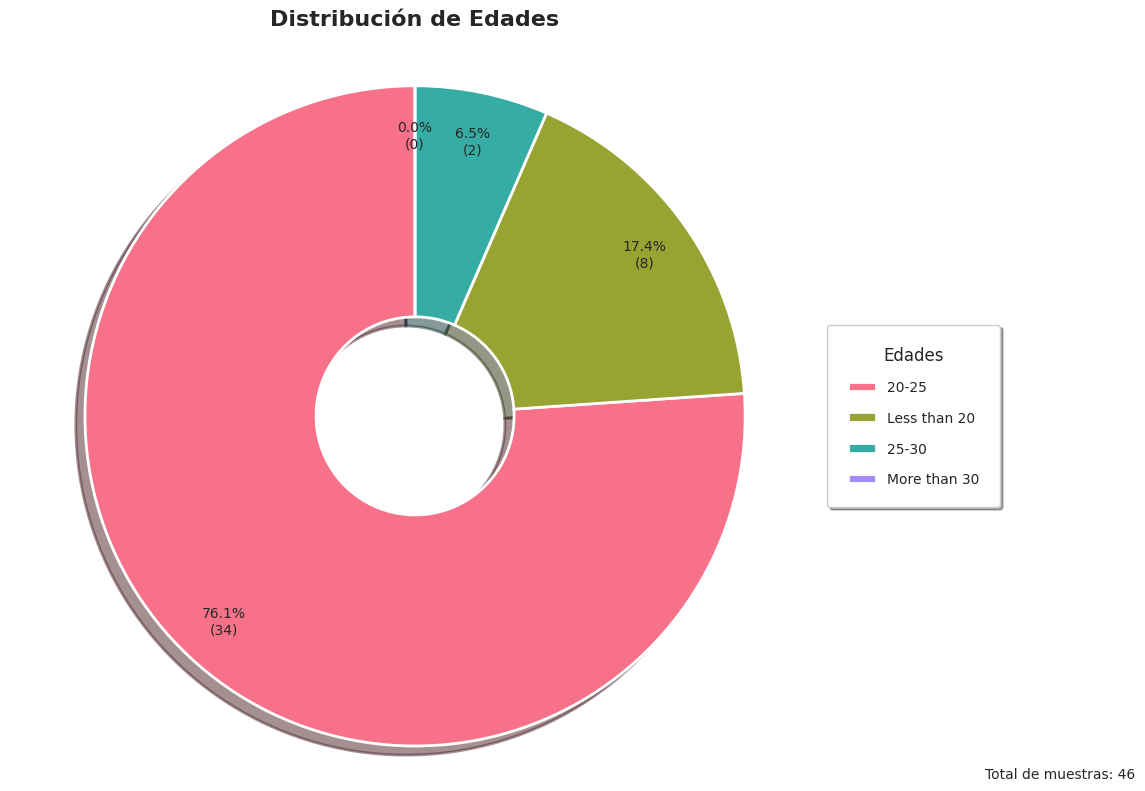

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
sns.set_palette("husl")

# Preparar los datos
age_counts = df_pcos_yes['Age'].value_counts()

# Crear la figura con mayor tamaño y resolución
plt.figure(figsize=(12, 8), dpi=100)

# Preparar colores personalizados
colors = sns.color_palette("husl", n_colors=len(age_counts))

# Crear el gráfico de tarta
wedges, texts, autotexts = plt.pie(age_counts.values,
                                  labels=None,
                                  autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(age_counts.values)):d})',
                                  startangle=90,
                                  colors=colors,
                                  pctdistance=0.85,
                                  wedgeprops=dict(width=0.7, edgecolor='white', linewidth=2),
                                  shadow=True)

# Añadir leyenda mejorada
plt.legend(wedges, 
          age_counts.index,
          title="Edades",
          title_fontsize=12,
          fontsize=10,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          borderpad=1.5,
          labelspacing=1.2,
          fancybox=True,
          shadow=True)

# Configurar el título
plt.title('Distribución de Edades de Pacientes PCOS',
          pad=20,
          fontsize=16,
          fontweight='bold',
          fontfamily='sans-serif')

# Asegurar que el gráfico sea circular
plt.axis('equal')

# Ajustar el layout
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Añadir el total de muestras
plt.figtext(0.95, 0.02,
            f'Total de muestras: {sum(age_counts.values)}',
            fontsize=10,
            ha='right')

# Mostrar el gráfico
plt.show()

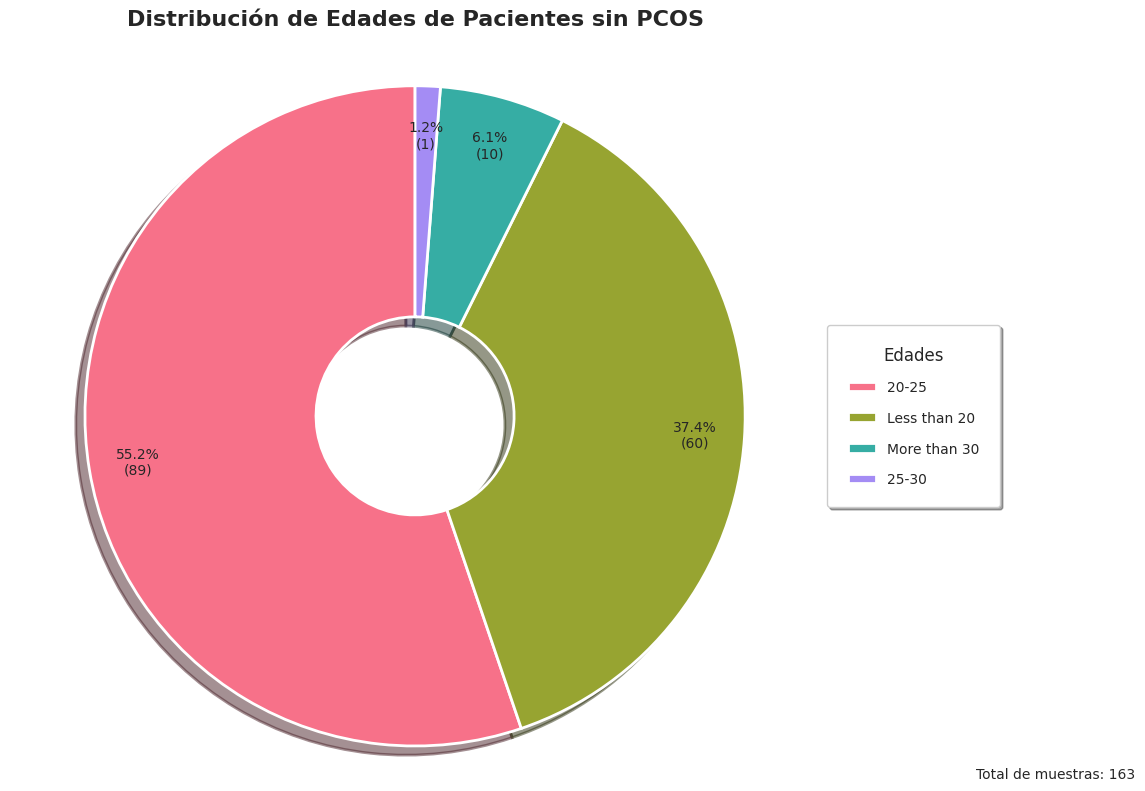

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
sns.set_palette("husl")

# Preparar los datos
age_counts = df_pcos_no['Age'].value_counts()

# Crear la figura con mayor tamaño y resolución
plt.figure(figsize=(12, 8), dpi=100)

# Preparar colores personalizados
colors = sns.color_palette("husl", n_colors=len(age_counts))

# Crear el gráfico de tarta
wedges, texts, autotexts = plt.pie(age_counts.values,
                                  labels=None,
                                  autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(age_counts.values)):d})',
                                  startangle=90,
                                  colors=colors,
                                  pctdistance=0.85,
                                  wedgeprops=dict(width=0.7, edgecolor='white', linewidth=2),
                                  shadow=True)

# Añadir leyenda mejorada
plt.legend(wedges, 
          age_counts.index,
          title="Edades",
          title_fontsize=12,
          fontsize=10,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          borderpad=1.5,
          labelspacing=1.2,
          fancybox=True,
          shadow=True)

# Configurar el título
plt.title('Distribución de Edades de Pacientes sin PCOS',
          pad=20,
          fontsize=16,
          fontweight='bold',
          fontfamily='sans-serif')

# Asegurar que el gráfico sea circular
plt.axis('equal')

# Ajustar el layout
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Añadir el total de muestras
plt.figtext(0.95, 0.02,
            f'Total de muestras: {sum(age_counts.values)}',
            fontsize=10,
            ha='right')

# Mostrar el gráfico
plt.show()

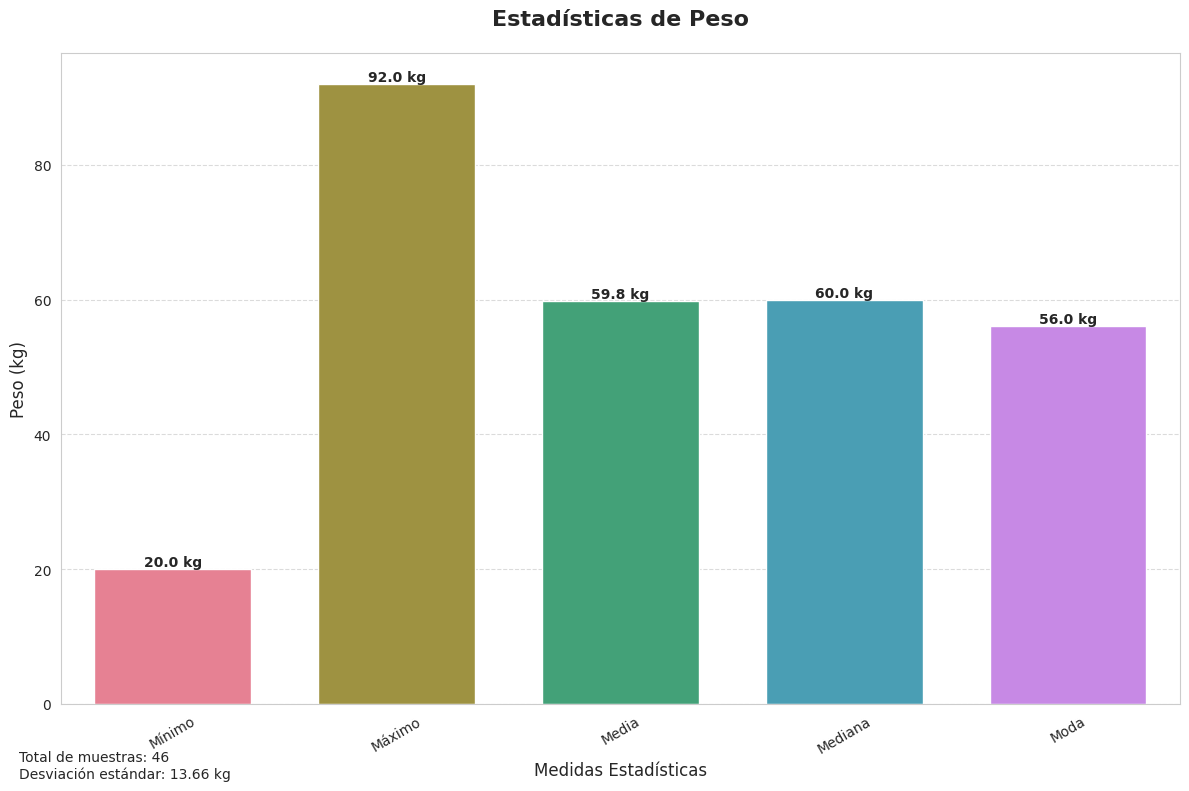

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
sns.set_palette("deep")

# Calcular estadísticas
stats = {
    'Mínimo': df_pcos_yes['Weight_kg'].min(),
    'Máximo': df_pcos_yes['Weight_kg'].max(),
    'Media': df_pcos_yes['Weight_kg'].mean(),
    'Mediana': df_pcos_yes['Weight_kg'].median(),
    'Moda': df_pcos_yes['Weight_kg'].mode().iloc[0] if not df_pcos_yes['Weight_kg'].mode().empty else np.nan
}

# Crear DataFrame para seaborn
df_stats = pd.DataFrame(list(stats.items()), columns=['Medida', 'Valor'])

# Crear la figura con mayor tamaño y resolución
plt.figure(figsize=(12, 8), dpi=100)

# Crear el gráfico de barras con seaborn
bars = sns.barplot(x='Medida', y='Valor', data=df_stats, 
                  palette='husl',
                  width=0.7)

# Personalizar el gráfico
plt.title('Estadísticas de Peso', 
         pad=20, 
         fontsize=16, 
         fontweight='bold')
plt.xlabel('Medidas Estadísticas', fontsize=12)
plt.ylabel('Peso (kg)', fontsize=12)

# Añadir los valores encima de cada barra con mejor formato
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f} kg',
             ha='center',
             va='bottom',
             fontsize=10,
             fontweight='bold')

# Añadir información adicional
plt.figtext(0.02, 0.02,
            f'Total de muestras: {len(df_pcos_yes)}\n'
            f'Desviación estándar: {df_pcos_yes["Weight_kg"].std():.2f} kg',
            fontsize=10,
            ha='left')

# Personalizar los ejes
plt.xticks(rotation=30)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

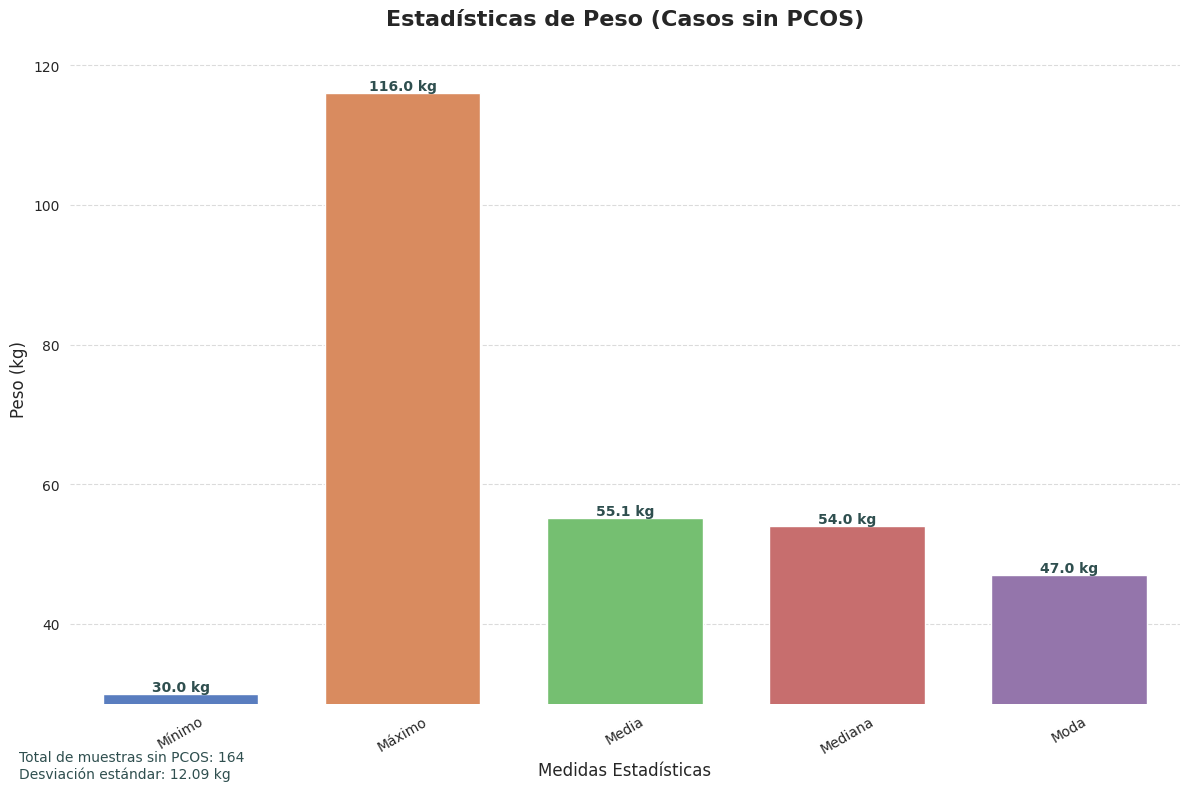

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
sns.set_palette("deep")

# Calcular estadísticas
stats = {
    'Mínimo': df_pcos_no['Weight_kg'].min(),
    'Máximo': df_pcos_no['Weight_kg'].max(),
    'Media': df_pcos_no['Weight_kg'].mean(),
    'Mediana': df_pcos_no['Weight_kg'].median(),
    'Moda': df_pcos_no['Weight_kg'].mode().iloc[0] if not df_pcos_no['Weight_kg'].mode().empty else np.nan
}

# Crear DataFrame para seaborn
df_stats = pd.DataFrame(list(stats.items()), columns=['Medida', 'Valor'])

# Crear la figura con mayor tamaño y resolución
plt.figure(figsize=(12, 8), dpi=100)

# Crear el gráfico de barras con seaborn
bars = sns.barplot(x='Medida', y='Valor', data=df_stats, 
                  palette='muted',  # Paleta diferente para distinguir del grupo anterior
                  width=0.7)

# Personalizar el gráfico
plt.title('Estadísticas de Peso (Casos sin PCOS)', 
         pad=20, 
         fontsize=16, 
         fontweight='bold')
plt.xlabel('Medidas Estadísticas', fontsize=12)
plt.ylabel('Peso (kg)', fontsize=12)

# Añadir los valores encima de cada barra con mejor formato
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f} kg',
             ha='center',
             va='bottom',
             fontsize=10,
             fontweight='bold',
             color='darkslategray')

# Añadir información adicional
plt.figtext(0.02, 0.02,
            f'Total de muestras sin PCOS: {len(df_pcos_no)}\n'
            f'Desviación estándar: {df_pcos_no["Weight_kg"].std():.2f} kg',
            fontsize=10,
            ha='left',
            color='darkslategray')

# Personalizar los ejes
plt.xticks(rotation=30)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar los límites del eje y para mejor visualización
ymin = df_pcos_no['Weight_kg'].min() * 0.95
ymax = df_pcos_no['Weight_kg'].max() * 1.05
plt.ylim(ymin, ymax)

# Añadir un fondo suave para mejor contraste
sns.despine(left=True, bottom=True)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

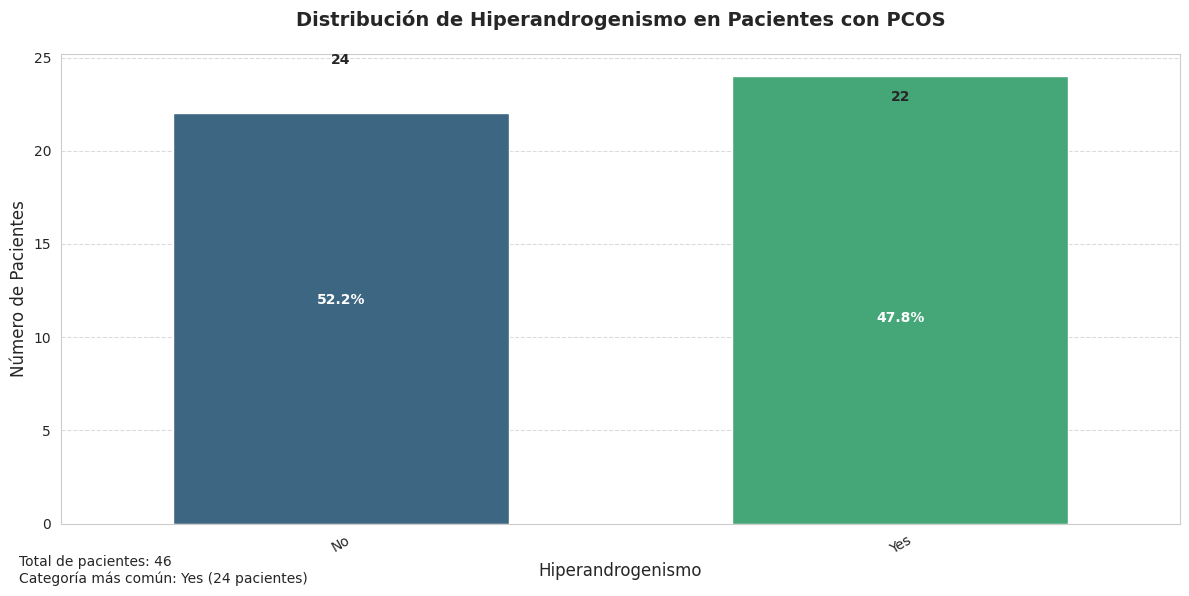

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), dpi=100)

# Calcular los conteos
df_pcos_yes = df_train[df_train['PCOS'] == 'Yes']
# Ordenar los valores para que 'Yes' aparezca primero
category_counts = df_pcos_yes['Hyperandrogenism'].value_counts().sort_index(ascending=False)

# Crear el gráfico de barras con seaborn
bars = sns.barplot(x=category_counts.index, 
                  y=category_counts.values,
                  palette='viridis',
                  width=0.6)

# Personalizar el título y etiquetas
plt.title('Distribución de Hiperandrogenismo en Pacientes con PCOS', 
         pad=20, 
         fontsize=14, 
         fontweight='bold')
plt.xlabel('Hiperandrogenismo', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)

# Añadir valores sobre las barras
for i, v in enumerate(category_counts.values):
    plt.text(i, v + (max(category_counts.values) * 0.02), 
             str(v),
             ha='center',
             va='bottom',
             fontweight='bold',
             fontsize=10)

# Añadir porcentajes
total = sum(category_counts.values)
for i, v in enumerate(category_counts.values):
    percentage = (v / total) * 100
    plt.text(i, v/2,
             f'{percentage:.1f}%',
             ha='center',
             va='center',
             color='white',
             fontweight='bold',
             fontsize=10)

# Añadir información adicional
plt.figtext(0.02, 0.02,
            f'Total de pacientes: {total}\n'
            f'Categoría más común: {category_counts.index[0]} ({category_counts.values[0]} pacientes)',
            fontsize=10,
            ha='left')

# Personalizar los ejes
plt.xticks(rotation=30)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

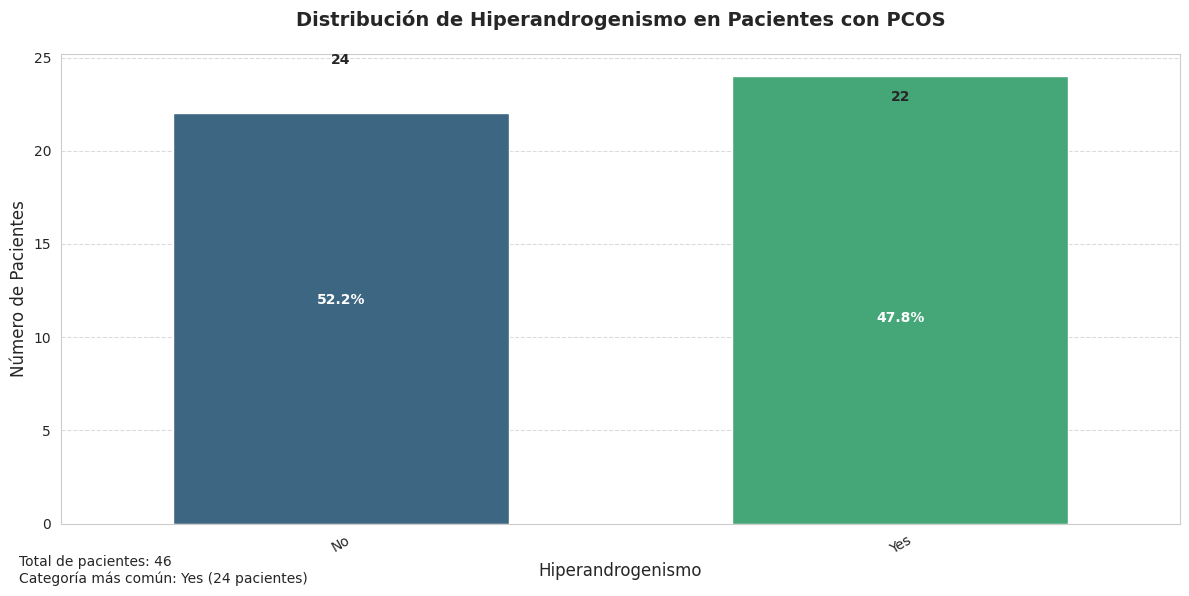

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), dpi=100)

# Calcular los conteos
df_pcos_yes = df_train[df_train['PCOS'] == 'Yes']
# Ordenar los valores para que 'Yes' aparezca primero
category_counts = df_pcos_yes['Hyperandrogenism'].value_counts().sort_index(ascending=False)

# Crear el gráfico de barras con seaborn
bars = sns.barplot(x=category_counts.index, 
                  y=category_counts.values,
                  palette='viridis',
                  width=0.6)

# Personalizar el título y etiquetas
plt.title('Distribución de Hiperandrogenismo en Pacientes con PCOS', 
         pad=20, 
         fontsize=14, 
         fontweight='bold')
plt.xlabel('Hiperandrogenismo', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)

# Añadir valores sobre las barras
for i, v in enumerate(category_counts.values):
    plt.text(i, v + (max(category_counts.values) * 0.02), 
             str(v),
             ha='center',
             va='bottom',
             fontweight='bold',
             fontsize=10)

# Añadir porcentajes
total = sum(category_counts.values)
for i, v in enumerate(category_counts.values):
    percentage = (v / total) * 100
    plt.text(i, v/2,
             f'{percentage:.1f}%',
             ha='center',
             va='center',
             color='white',
             fontweight='bold',
             fontsize=10)

# Añadir información adicional
plt.figtext(0.02, 0.02,
            f'Total de pacientes: {total}\n'
            f'Categoría más común: {category_counts.index[0]} ({category_counts.values[0]} pacientes)',
            fontsize=10,
            ha='left')

# Personalizar los ejes
plt.xticks(rotation=30)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

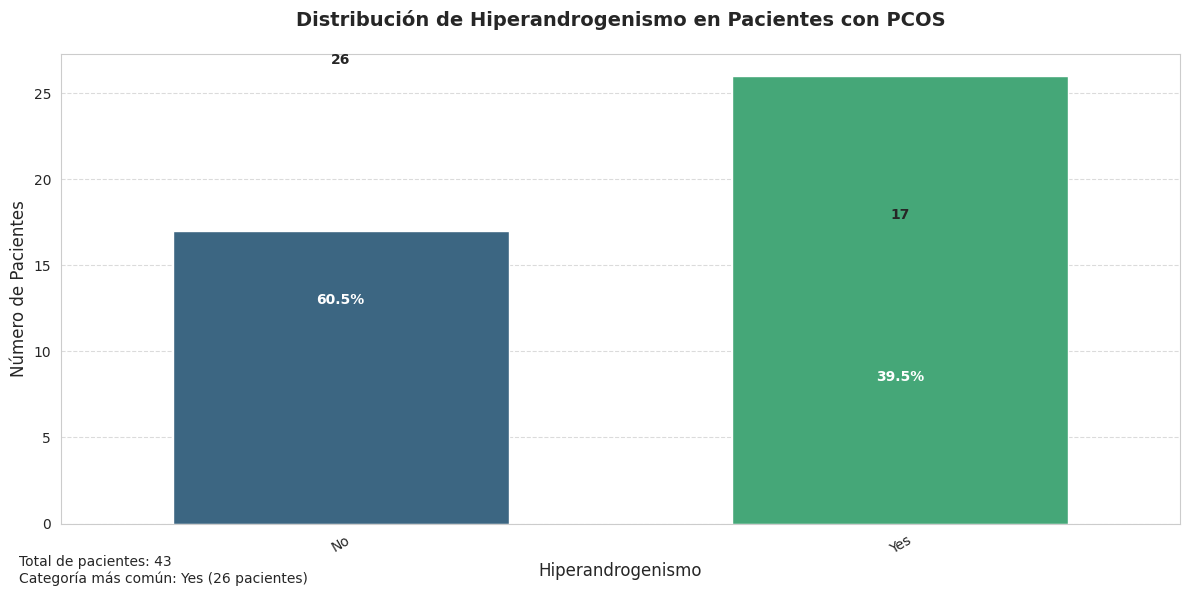

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), dpi=100)

# Calcular los conteos
df_pcos_yes = df_train[df_train['PCOS'] == 'Yes']
# Ordenar los valores para que 'Yes' aparezca primero
category_counts = df_pcos_yes['Hirsutism'].value_counts().sort_index(ascending=False)

# Crear el gráfico de barras con seaborn
bars = sns.barplot(x=category_counts.index, 
                  y=category_counts.values,
                  palette='viridis',
                  width=0.6)

# Personalizar el título y etiquetas
plt.title('Distribución de Hiperandrogenismo en Pacientes con PCOS', 
         pad=20, 
         fontsize=14, 
         fontweight='bold')
plt.xlabel('Hiperandrogenismo', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)

# Añadir valores sobre las barras
for i, v in enumerate(category_counts.values):
    plt.text(i, v + (max(category_counts.values) * 0.02), 
             str(v),
             ha='center',
             va='bottom',
             fontweight='bold',
             fontsize=10)

# Añadir porcentajes
total = sum(category_counts.values)
for i, v in enumerate(category_counts.values):
    percentage = (v / total) * 100
    plt.text(i, v/2,
             f'{percentage:.1f}%',
             ha='center',
             va='center',
             color='white',
             fontweight='bold',
             fontsize=10)

# Añadir información adicional
plt.figtext(0.02, 0.02,
            f'Total de pacientes: {total}\n'
            f'Categoría más común: {category_counts.index[0]} ({category_counts.values[0]} pacientes)',
            fontsize=10,
            ha='left')

# Personalizar los ejes
plt.xticks(rotation=30)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

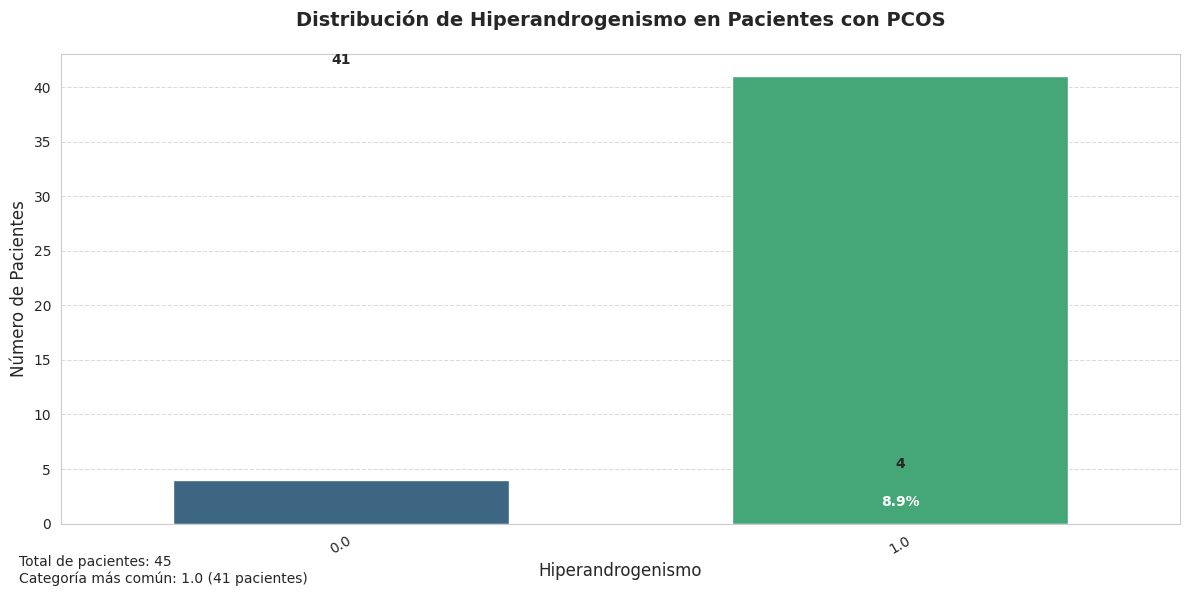

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), dpi=100)

# Calcular los conteos
df_pcos_yes = df_train[df_train['PCOS'] == 'Yes']
# Ordenar los valores para que 'Yes' aparezca primero
category_counts = df_pcos_yes['Hormonal_Imbalance'].value_counts().sort_index(ascending=False)

# Crear el gráfico de barras con seaborn
bars = sns.barplot(x=category_counts.index, 
                  y=category_counts.values,
                  palette='viridis',
                  width=0.6)

# Personalizar el título y etiquetas
plt.title('Distribución de Hiperandrogenismo en Pacientes con PCOS', 
         pad=20, 
         fontsize=14, 
         fontweight='bold')
plt.xlabel('Hiperandrogenismo', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)

# Añadir valores sobre las barras
for i, v in enumerate(category_counts.values):
    plt.text(i, v + (max(category_counts.values) * 0.02), 
             str(v),
             ha='center',
             va='bottom',
             fontweight='bold',
             fontsize=10)

# Añadir porcentajes
total = sum(category_counts.values)
for i, v in enumerate(category_counts.values):
    percentage = (v / total) * 100
    plt.text(i, v/2,
             f'{percentage:.1f}%',
             ha='center',
             va='center',
             color='white',
             fontweight='bold',
             fontsize=10)

# Añadir información adicional
plt.figtext(0.02, 0.02,
            f'Total de pacientes: {total}\n'
            f'Categoría más común: {category_counts.index[0]} ({category_counts.values[0]} pacientes)',
            fontsize=10,
            ha='left')

# Personalizar los ejes
plt.xticks(rotation=30)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

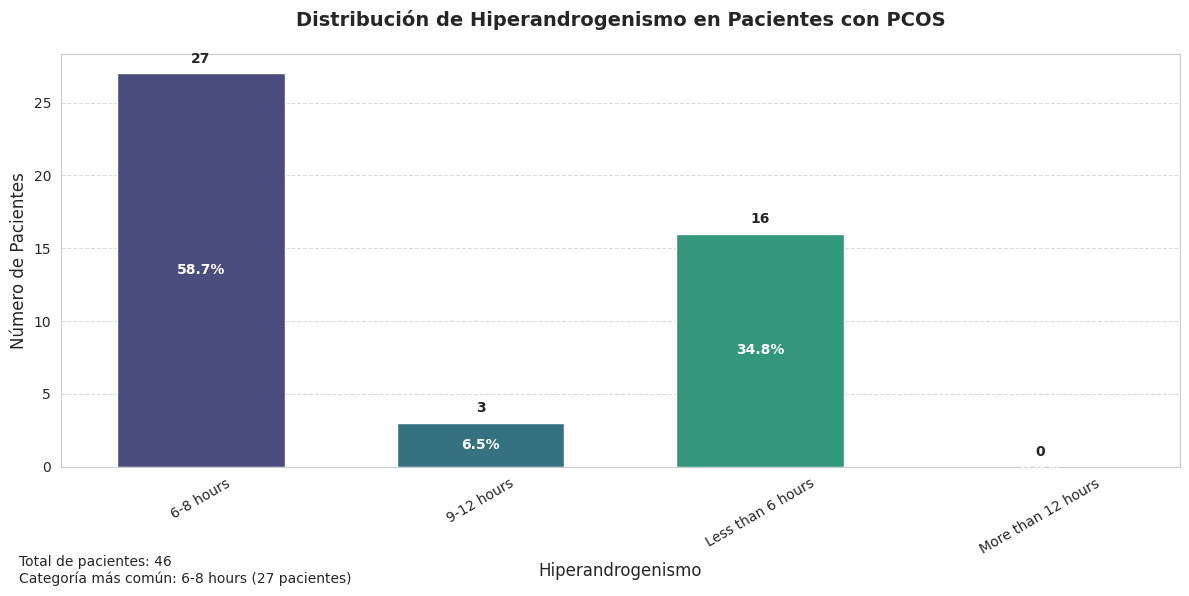

In [84]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), dpi=100)

# Calcular los conteos
df_pcos_yes = df_train[df_train['PCOS'] == 'Yes']
# Ordenar los valores para que 'Yes' aparezca primero
category_counts = df_pcos_yes['Sleep_Hours'].value_counts().sort_index(ascending=True)

# Crear el gráfico de barras con seaborn
bars = sns.barplot(x=category_counts.index, 
                  y=category_counts.values,
                  palette='viridis',
                  width=0.6)

# Personalizar el título y etiquetas
plt.title('Distribución de Hiperandrogenismo en Pacientes con PCOS', 
         pad=20, 
         fontsize=14, 
         fontweight='bold')
plt.xlabel('Hiperandrogenismo', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)

# Añadir valores sobre las barras
for i, v in enumerate(category_counts.values):
    plt.text(i, v + (max(category_counts.values) * 0.02), 
             str(v),
             ha='center',
             va='bottom',
             fontweight='bold',
             fontsize=10)

# Añadir porcentajes
total = sum(category_counts.values)
for i, v in enumerate(category_counts.values):
    percentage = (v / total) * 100
    plt.text(i, v/2,
             f'{percentage:.1f}%',
             ha='center',
             va='center',
             color='white',
             fontweight='bold',
             fontsize=10)

# Añadir información adicional
plt.figtext(0.02, 0.02,
            f'Total de pacientes: {total}\n'
            f'Categoría más común: {category_counts.index[0]} ({category_counts.values[0]} pacientes)',
            fontsize=10,
            ha='left')

# Personalizar los ejes
plt.xticks(rotation=30)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

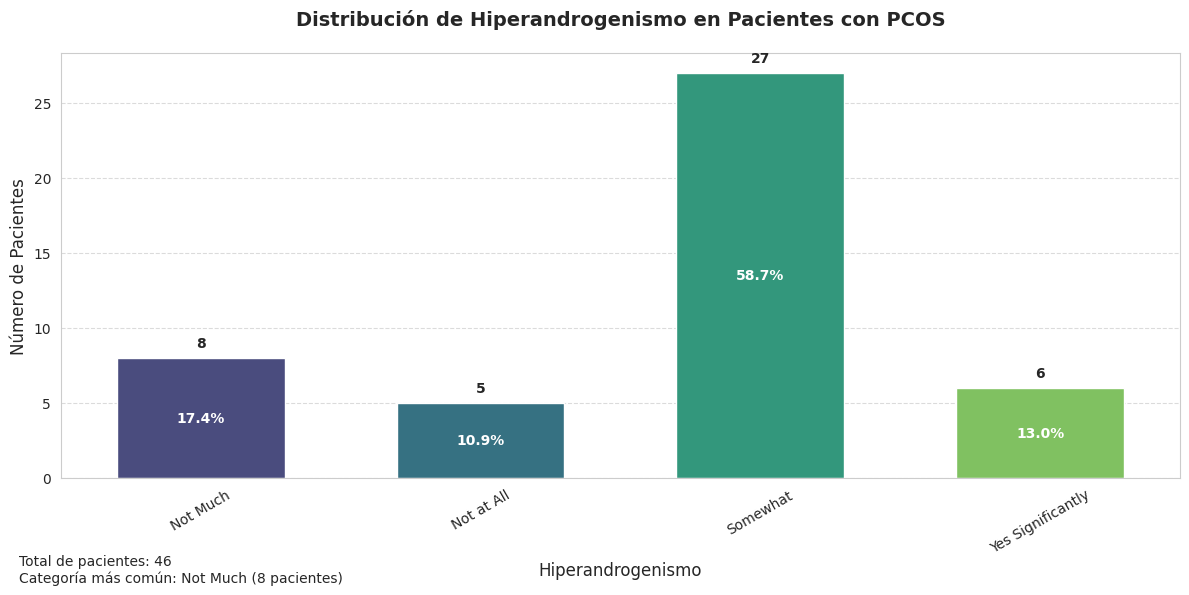

In [83]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), dpi=100)

# Calcular los conteos
df_pcos_yes = df_train[df_train['PCOS'] == 'Yes']
# Ordenar los valores para que 'Yes' aparezca primero
category_counts = df_pcos_yes['Exercise_Frequency'].value_counts().sort_index(ascending=True)

# Crear el gráfico de barras con seaborn
bars = sns.barplot(x=category_counts.index, 
                  y=category_counts.values,
                  palette='viridis',
                  width=0.6)

# Personalizar el título y etiquetas
plt.title('Distribución de Hiperandrogenismo en Pacientes con PCOS', 
         pad=20, 
         fontsize=14, 
         fontweight='bold')
plt.xlabel('Hiperandrogenismo', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)

# Añadir valores sobre las barras
for i, v in enumerate(category_counts.values):
    plt.text(i, v + (max(category_counts.values) * 0.02), 
             str(v),
             ha='center',
             va='bottom',
             fontweight='bold',
             fontsize=10)

# Añadir porcentajes
total = sum(category_counts.values)
for i, v in enumerate(category_counts.values):
    percentage = (v / total) * 100
    plt.text(i, v/2,
             f'{percentage:.1f}%',
             ha='center',
             va='center',
             color='white',
             fontweight='bold',
             fontsize=10)

# Añadir información adicional
plt.figtext(0.02, 0.02,
            f'Total de pacientes: {total}\n'
            f'Categoría más común: {category_counts.index[0]} ({category_counts.values[0]} pacientes)',
            fontsize=10,
            ha='left')

# Personalizar los ejes
plt.xticks(rotation=30)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

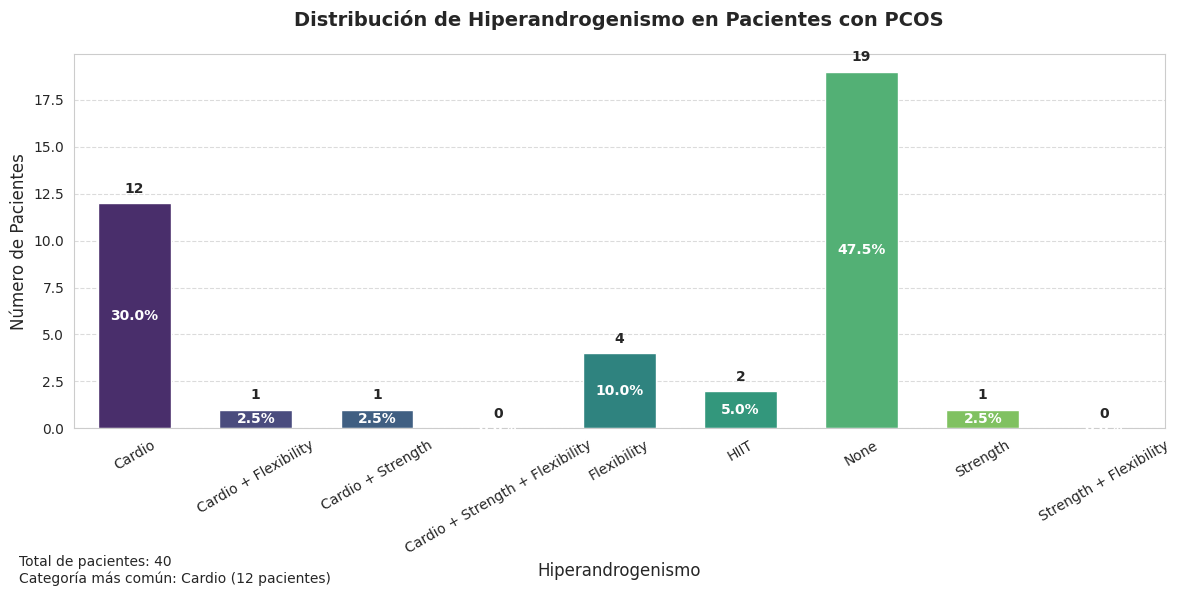

In [89]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), dpi=100)

# Calcular los conteos
df_pcos_yes = df_train[df_train['PCOS'] == 'Yes']
# Ordenar los valores para que 'Yes' aparezca primero
category_counts = df_pcos_yes['Exercise_Type'].value_counts().sort_index(ascending=True)

# Crear el gráfico de barras con seaborn
bars = sns.barplot(x=category_counts.index, 
                  y=category_counts.values,
                  palette='viridis',
                  width=0.6)

# Personalizar el título y etiquetas
plt.title('Distribución de Hiperandrogenismo en Pacientes con PCOS', 
         pad=20, 
         fontsize=14, 
         fontweight='bold')
plt.xlabel('Hiperandrogenismo', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)

# Añadir valores sobre las barras
for i, v in enumerate(category_counts.values):
    plt.text(i, v + (max(category_counts.values) * 0.02), 
             str(v),
             ha='center',
             va='bottom',
             fontweight='bold',
             fontsize=10)

# Añadir porcentajes
total = sum(category_counts.values)
for i, v in enumerate(category_counts.values):
    percentage = (v / total) * 100
    plt.text(i, v/2,
             f'{percentage:.1f}%',
             ha='center',
             va='center',
             color='white',
             fontweight='bold',
             fontsize=10)

# Añadir información adicional
plt.figtext(0.02, 0.02,
            f'Total de pacientes: {total}\n'
            f'Categoría más común: {category_counts.index[0]} ({category_counts.values[0]} pacientes)',
            fontsize=10,
            ha='left')

# Personalizar los ejes
plt.xticks(rotation=30)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

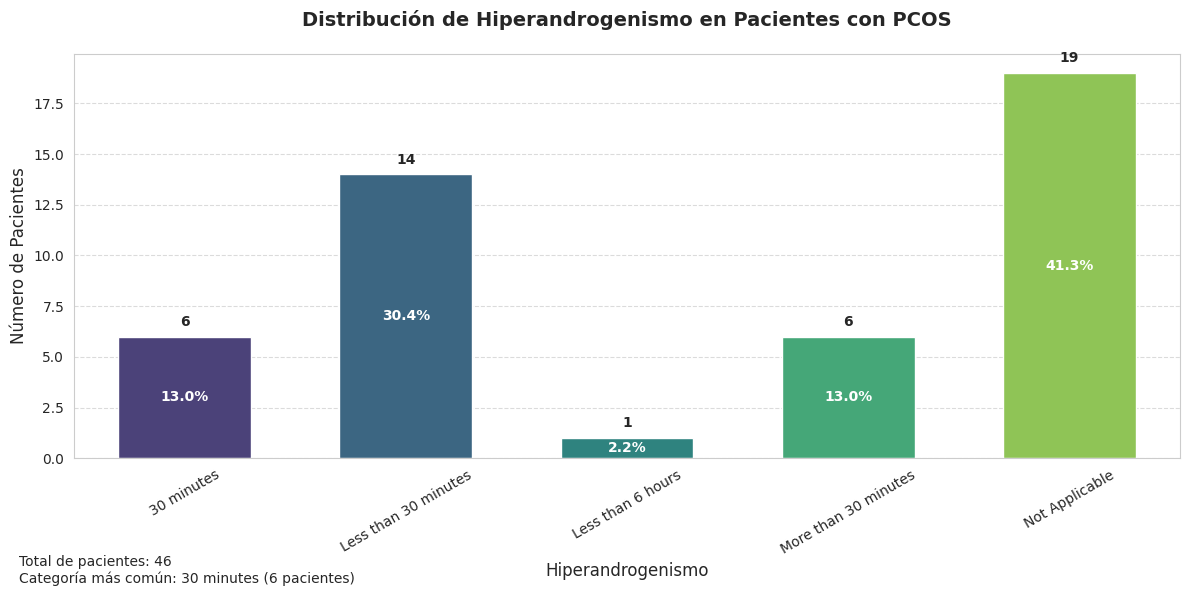

In [85]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), dpi=100)

# Calcular los conteos
df_pcos_yes = df_train[df_train['PCOS'] == 'Yes']
# Ordenar los valores para que 'Yes' aparezca primero
category_counts = df_pcos_yes['Exercise_Duration'].value_counts().sort_index(ascending=True)

# Crear el gráfico de barras con seaborn
bars = sns.barplot(x=category_counts.index, 
                  y=category_counts.values,
                  palette='viridis',
                  width=0.6)

# Personalizar el título y etiquetas
plt.title('Distribución de Hiperandrogenismo en Pacientes con PCOS', 
         pad=20, 
         fontsize=14, 
         fontweight='bold')
plt.xlabel('Hiperandrogenismo', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)

# Añadir valores sobre las barras
for i, v in enumerate(category_counts.values):
    plt.text(i, v + (max(category_counts.values) * 0.02), 
             str(v),
             ha='center',
             va='bottom',
             fontweight='bold',
             fontsize=10)

# Añadir porcentajes
total = sum(category_counts.values)
for i, v in enumerate(category_counts.values):
    percentage = (v / total) * 100
    plt.text(i, v/2,
             f'{percentage:.1f}%',
             ha='center',
             va='center',
             color='white',
             fontweight='bold',
             fontsize=10)

# Añadir información adicional
plt.figtext(0.02, 0.02,
            f'Total de pacientes: {total}\n'
            f'Categoría más común: {category_counts.index[0]} ({category_counts.values[0]} pacientes)',
            fontsize=10,
            ha='left')

# Personalizar los ejes
plt.xticks(rotation=30)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

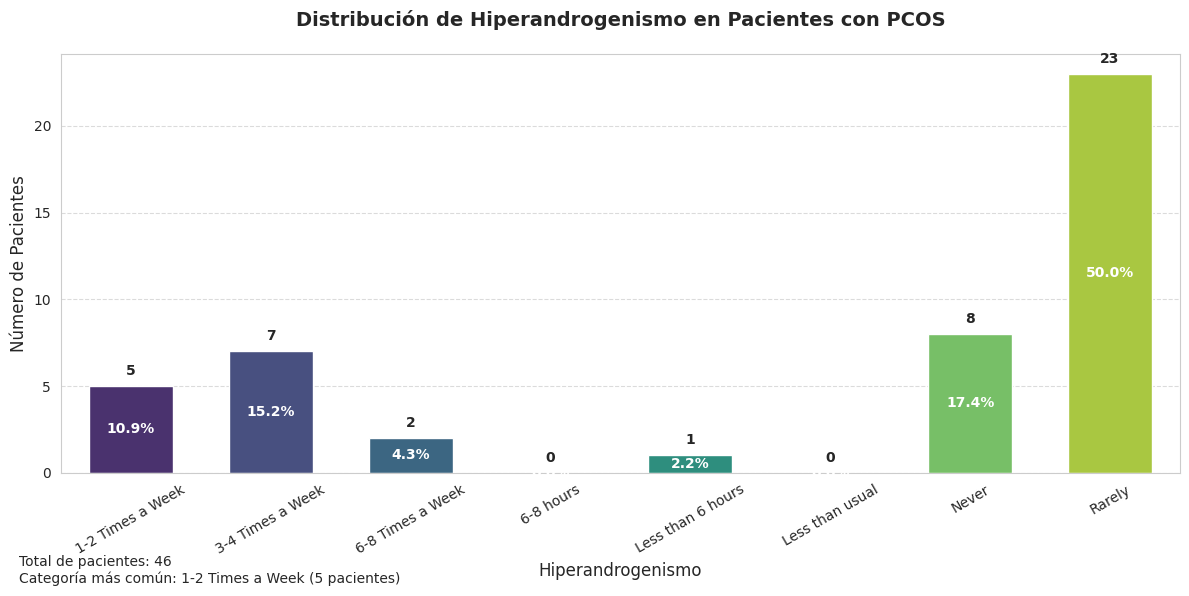

In [82]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), dpi=100)

# Calcular los conteos
df_pcos_yes = df_train[df_train['PCOS'] == 'Yes']
# Ordenar los valores para que 'Yes' aparezca primero
category_counts = df_pcos_yes['Exercise_Frequency'].value_counts().sort_index(ascending=True)

# Crear el gráfico de barras con seaborn
bars = sns.barplot(x=category_counts.index, 
                  y=category_counts.values,
                  palette='viridis',
                  width=0.6)

# Personalizar el título y etiquetas
plt.title('Distribución de Hiperandrogenismo en Pacientes con PCOS', 
         pad=20, 
         fontsize=14, 
         fontweight='bold')
plt.xlabel('Hiperandrogenismo', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)

# Añadir valores sobre las barras
for i, v in enumerate(category_counts.values):
    plt.text(i, v + (max(category_counts.values) * 0.02), 
             str(v),
             ha='center',
             va='bottom',
             fontweight='bold',
             fontsize=10)

# Añadir porcentajes
total = sum(category_counts.values)
for i, v in enumerate(category_counts.values):
    percentage = (v / total) * 100
    plt.text(i, v/2,
             f'{percentage:.1f}%',
             ha='center',
             va='center',
             color='white',
             fontweight='bold',
             fontsize=10)

# Añadir información adicional
plt.figtext(0.02, 0.02,
            f'Total de pacientes: {total}\n'
            f'Categoría más común: {category_counts.index[0]} ({category_counts.values[0]} pacientes)',
            fontsize=10,
            ha='left')

# Personalizar los ejes
plt.xticks(rotation=30)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

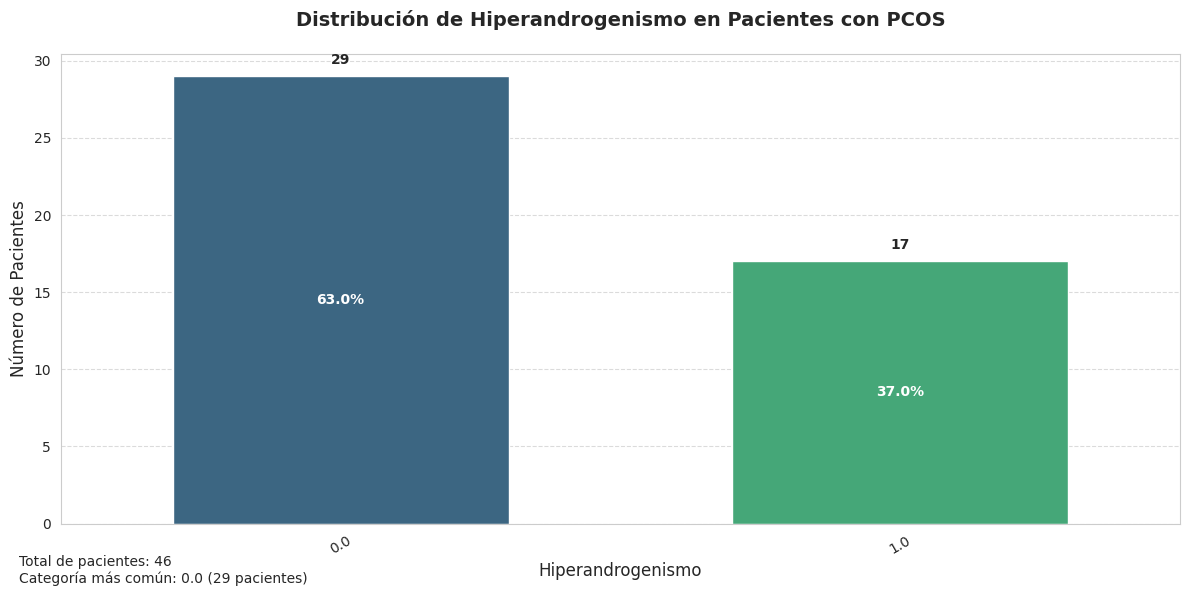

In [81]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), dpi=100)

# Calcular los conteos
df_pcos_yes = df_train[df_train['PCOS'] == 'Yes']
# Ordenar los valores para que 'Yes' aparezca primero
category_counts = df_pcos_yes['Insulin_Resistance'].value_counts().sort_index(ascending=True)

# Crear el gráfico de barras con seaborn
bars = sns.barplot(x=category_counts.index, 
                  y=category_counts.values,
                  palette='viridis',
                  width=0.6)

# Personalizar el título y etiquetas
plt.title('Distribución de Hiperandrogenismo en Pacientes con PCOS', 
         pad=20, 
         fontsize=14, 
         fontweight='bold')
plt.xlabel('Hiperandrogenismo', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)

# Añadir valores sobre las barras
for i, v in enumerate(category_counts.values):
    plt.text(i, v + (max(category_counts.values) * 0.02), 
             str(v),
             ha='center',
             va='bottom',
             fontweight='bold',
             fontsize=10)

# Añadir porcentajes
total = sum(category_counts.values)
for i, v in enumerate(category_counts.values):
    percentage = (v / total) * 100
    plt.text(i, v/2,
             f'{percentage:.1f}%',
             ha='center',
             va='center',
             color='white',
             fontweight='bold',
             fontsize=10)

# Añadir información adicional
plt.figtext(0.02, 0.02,
            f'Total de pacientes: {total}\n'
            f'Categoría más común: {category_counts.index[0]} ({category_counts.values[0]} pacientes)',
            fontsize=10,
            ha='left')

# Personalizar los ejes
plt.xticks(rotation=30)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

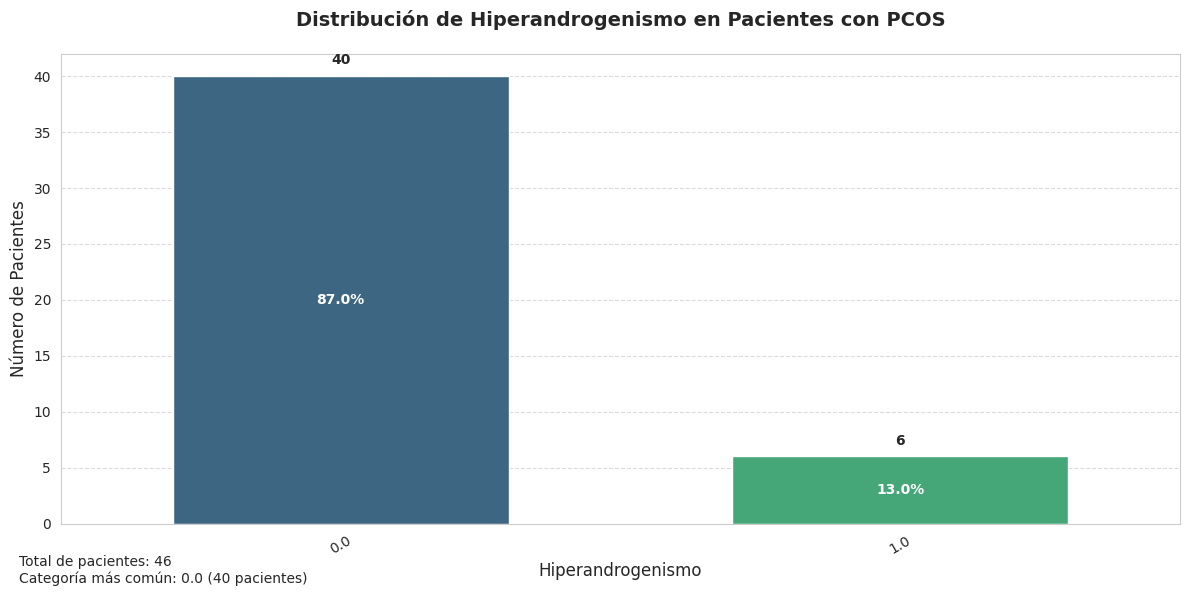

In [87]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), dpi=100)

# Calcular los conteos
df_pcos_yes = df_train[df_train['PCOS'] == 'Yes']
# Ordenar los valores para que 'Yes' aparezca primero
category_counts = df_pcos_yes['Conception_Difficulty'].value_counts().sort_index(ascending=True)

# Crear el gráfico de barras con seaborn
bars = sns.barplot(x=category_counts.index, 
                  y=category_counts.values,
                  palette='viridis',
                  width=0.6)

# Personalizar el título y etiquetas
plt.title('Distribución de Hiperandrogenismo en Pacientes con PCOS', 
         pad=20, 
         fontsize=14, 
         fontweight='bold')
plt.xlabel('Hiperandrogenismo', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)

# Añadir valores sobre las barras
for i, v in enumerate(category_counts.values):
    plt.text(i, v + (max(category_counts.values) * 0.02), 
             str(v),
             ha='center',
             va='bottom',
             fontweight='bold',
             fontsize=10)

# Añadir porcentajes
total = sum(category_counts.values)
for i, v in enumerate(category_counts.values):
    percentage = (v / total) * 100
    plt.text(i, v/2,
             f'{percentage:.1f}%',
             ha='center',
             va='center',
             color='white',
             fontweight='bold',
             fontsize=10)

# Añadir información adicional
plt.figtext(0.02, 0.02,
            f'Total de pacientes: {total}\n'
            f'Categoría más común: {category_counts.index[0]} ({category_counts.values[0]} pacientes)',
            fontsize=10,
            ha='left')

# Personalizar los ejes
plt.xticks(rotation=30)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

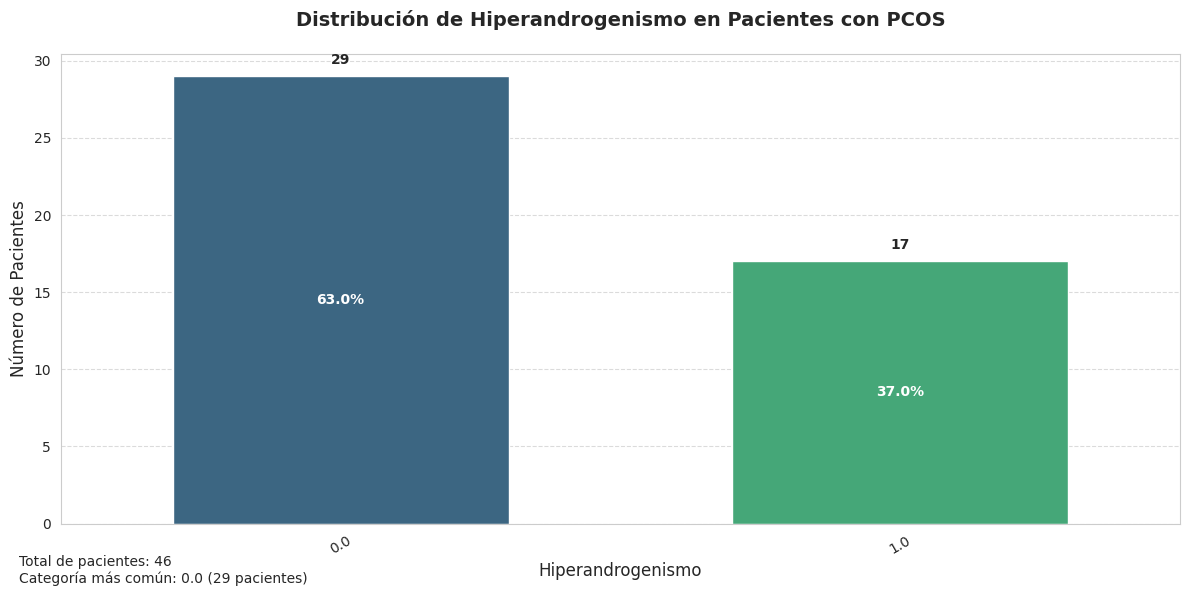

In [96]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), dpi=100)

# Calcular los conteos
df_pcos_yes = df_train[df_train['PCOS'] == 'Yes']
# Ordenar los valores para que 'Yes' aparezca primero
category_counts = df_pcos_yes['Insulin_Resistance'].value_counts().sort_index(ascending=True)

# Crear el gráfico de barras con seaborn
bars = sns.barplot(x=category_counts.index, 
                  y=category_counts.values,
                  palette='viridis',
                  width=0.6)

# Personalizar el título y etiquetas
plt.title('Distribución de Hiperandrogenismo en Pacientes con PCOS', 
         pad=20, 
         fontsize=14, 
         fontweight='bold')
plt.xlabel('Hiperandrogenismo', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)

# Añadir valores sobre las barras
for i, v in enumerate(category_counts.values):
    plt.text(i, v + (max(category_counts.values) * 0.02), 
             str(v),
             ha='center',
             va='bottom',
             fontweight='bold',
             fontsize=10)

# Añadir porcentajes
total = sum(category_counts.values)
for i, v in enumerate(category_counts.values):
    percentage = (v / total) * 100
    plt.text(i, v/2,
             f'{percentage:.1f}%',
             ha='center',
             va='center',
             color='white',
             fontweight='bold',
             fontsize=10)

# Añadir información adicional
plt.figtext(0.02, 0.02,
            f'Total de pacientes: {total}\n'
            f'Categoría más común: {category_counts.index[0]} ({category_counts.values[0]} pacientes)',
            fontsize=10,
            ha='left')

# Personalizar los ejes
plt.xticks(rotation=30)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## 7) Entrenamiento

In [122]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X_train = df_train.drop('PCOS', axis=1)
y_train = df_train['PCOS'].map({'Yes': 1, 'No': 0}) 

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['category']).columns

In [131]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = RandomForestClassifier(
    n_estimators=500, 
    max_depth=25, 
    min_samples_split=3, 
    min_samples_leaf=1, 
    max_features='sqrt', 
    class_weight='balanced', 
    random_state=42
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ID', 'Weight_kg'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Age', 'Hormonal_Imbalance', 'Hyperandrogenism', 'Hirsutism',
       'Conception_Difficulty', 'Insulin_Resistance', 'Exercise_Frequency',
       'Exercise_Type', 'Exercise_Duration', 'Sleep_Hours',
       'Exercise_Benefit'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=25,
                                        min_samples_split=3, n_estimators=500,
                                        random_state=42))])

In [124]:
X_test = test.copy()

In [128]:
probabilities = pipeline.predict_proba(X_test)[:, 1]
probabilities

array([0.30126469, 0.34935451, 0.33650308, 0.28530677, 0.3162862 ,
       0.32878699, 0.28342445, 0.31291924, 0.37764268, 0.30112064,
       0.28747379, 0.22898439, 0.36471819, 0.25055716, 0.29188963,
       0.2654878 , 0.27215255, 0.31324649, 0.22728314, 0.24933592,
       0.3047138 , 0.32134151, 0.25220949, 0.30203061, 0.28343892,
       0.32557463, 0.71053955, 0.28312397, 0.23901082, 0.29944482,
       0.2931516 , 0.36729915, 0.30811777, 0.30490905, 0.30958408,
       0.34757383, 0.57852383, 0.3555552 , 0.2552627 , 0.27665693,
       0.28167109, 0.22648556, 0.27711528, 0.29204029, 0.28740335,
       0.63530868, 0.28354442, 0.65765556, 0.3107071 , 0.33298843,
       0.36794413, 0.33760408, 0.2369744 , 0.59183199, 0.34655242,
       0.61454209, 0.60206537, 0.62946785, 0.28632709, 0.25496304,
       0.21582031, 0.2860436 , 0.36296776, 0.31129816, 0.32250466,
       0.56968787, 0.32190753, 0.38072207, 0.29208674, 0.34077716,
       0.41327362, 0.49009686, 0.31042344, 0.26638612, 0.32264

In [129]:
import pandas as pd
from IPython.display import FileLink
from datetime import datetime

# Crear el DataFrame de submission
submission = pd.DataFrame({
    'ID': test['ID'],
    'PCOS': probabilities 
})

# Crear nombre de archivo con timestamp para evitar sobrescrituras
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
filename = f'submission_{timestamp}.csv'

# Guardar el archivo
submission.to_csv(filename, index=False)
print(f"✅ Archivo guardado como '{filename}'")

# Crear el link de descarga
display(FileLink(filename))

✅ Archivo guardado como 'submission_20250213_180303.csv'


/kaggle/working/submission_20250213_180303.csv